##Neural Networks

In [ ]:
# Data handling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Machine Learning Models and Metrics
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

# Neural Network - TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Additional Utilities
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [ ]:
# 1. Loading the Dataset
anxiety = pd.read_csv('clean_game.csv')

# Displaying the first few rows of the dataset
anxiety.head()

,Age,Birthplace,Degree,GADT_Cat,GAD_T,Game,Gender,Hours,League_clean,Narcissism,...,Platform,Playstyle_clean,Residence,SPINT_Cat,SPIN_T,SWLT_Cat,SWL_T,Work,earnings_clean,whyplay_clean
0,25,USA,Bachelor (or equivalent),minimal anxiety,0,League of Legends,Male,25.0,gold,1.0,...,PC,Multiplayer - online - with real life friends,USA,None,3.0,Extremely satisfied,33,Employed,Fun,fun
1,36,Romania,Bachelor (or equivalent),mild anxiety,5,League of Legends,Male,5.0,unranked,3.0,...,PC,Multiplayer - online - with strangers,Romania,Moderate,31.0,Satisfied,26,Employed,Fun,fun
2,23,UK,High school diploma (or equivalent),minimal anxiety,0,League of Legends,Female,9.0,silver,4.0,...,PC,Multiplayer - online - with real life friends,UK,Moderate,39.0,Satisfied,26,Employed,Fun,improving
3,25,USA,Master (or equivalent),minimal anxiety,1,League of Legends,Male,7.0,gold,2.0,...,PC,Multiplayer - online - with strangers,USA,Mild,29.0,Slightly satisfied,21,Student at college / university,Fun,fun
4,18,USA,High school diploma (or equivalent),moderate anxiety,11,League of Legends,Male,25.0,unranked,3.0,...,PC,Multiplayer - online - with strangers,USA,None,17.0,dissatisfied,10,Student at college / university,Fun,improving


In [ ]:
# Separating numerical and categorical data
numerical_data = anxiety[['GAD_T', 'Hours', 'SPIN_T', 'SWL_T']]
categorical_data = anxiety[['whyplay_clean', 'League_clean', 'Narcissism_Cat', 'Playstyle_clean' , 'Work' , 'earnings_clean']]

# Normalizing numerical data
scaler = MinMaxScaler()
numerical_data_norm = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)

# Encoding categorical data
encoder = OneHotEncoder(sparse=False)
categorical_data_encoded = pd.DataFrame(encoder.fit_transform(categorical_data), columns=encoder.get_feature_names_out())

# Recombining the data
dataForNN_norm = pd.concat([numerical_data_norm, categorical_data_encoded], axis=1)

# Display summary statistics
print("Before Normalization:", anxiety.describe())
print("After Normalization:", dataForNN_norm.describe())

Before Normalization:                 Age        GAD_T         Hours    Narcissism        SPIN_T  \
count  10591.000000  10591.00000  10591.000000  10591.000000  10591.000000   
mean      20.828911      5.17411     21.360023      2.021433     19.730998   
std        3.154145      4.66851     13.257550      1.057378     13.368407   
min       18.000000      0.00000      0.000000      1.000000      0.000000   
25%       18.000000      2.00000     12.000000      1.000000      9.000000   
50%       20.000000      4.00000     20.000000      2.000000     17.000000   
75%       22.000000      8.00000     28.000000      3.000000     28.000000   
max       56.000000     21.00000    120.000000      5.000000     68.000000   

              SWL_T  
count  10591.000000  
mean      19.838825  
std        7.181354  
min        5.000000  
25%       14.000000  
50%       20.000000  
75%       26.000000  
max       35.000000  
After Normalization:               GAD_T         Hours        SPIN_T         

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(dataForNN_norm, test_size=0.2, random_state=42)

# Displaying the shape of test and train datasets
train_data.shape, test_data.shape

((8472, 35), (2119, 35))

In [ ]:
# Preparing the data for neural network models
X_train = train_data.drop('GAD_T', axis=1)
y_train = train_data['GAD_T']
X_test = test_data.drop('GAD_T', axis=1)
y_test = test_data['GAD_T']

#### Regression Analanysis with Neural Network From TensorFlow

In [ ]:
# Function to build, train, and evaluate the model
def build_and_evaluate_model(layers, activation, X_train, y_train, X_test, y_test):
    model_reg_nn = Sequential()
    model_reg_nn.add(Dense(layers[0], activation=activation, input_shape=(X_train.shape[1],)))
    for layer_size in layers[1:]:
        model_reg_nn.add(Dense(layer_size, activation=activation))
    model_reg_nn.add(Dense(1))

    model_reg_nn.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])

    history = model_reg_nn.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
    return model_reg_nn, history

In [ ]:
# Defining configurations
layer_configs = [(10,), (20,), (10, 10), (20, 10), (20, 20), (30, 20, 10), (40, 30, 20, 10)]
activations = ['relu', 'sigmoid']

# Dictionary to store results
results_reg_nn = {}

# Iterate over configurations
for activation in activations:
    for layers in layer_configs:
        model_reg, history = build_and_evaluate_model(layers, activation, X_train, y_train, X_test, y_test)
        results_reg_nn[(layers, activation)] = history.history

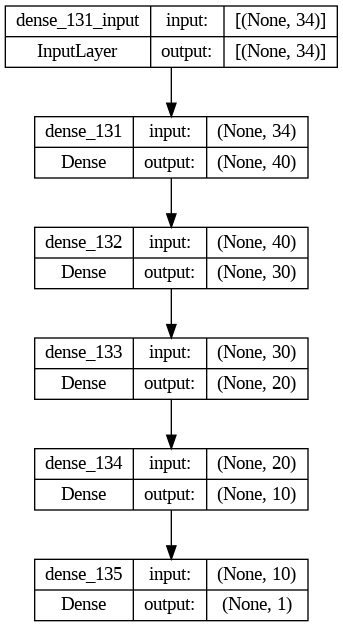

In [ ]:
# Plotting the neural network architecture diagram:
plot_model(model_reg, to_file='model_reg_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
results_reg_nn

{((10,),
  'relu'): {'loss': [0.06763207912445068,
   0.041859984397888184,
   0.03746723756194115,
   0.036340437829494476,
   0.0357864573597908,
   0.035379815846681595,
   0.035160861909389496,
   0.03506303206086159,
   0.0349060520529747,
   0.03486179932951927,
   0.034709978848695755,
   0.034604039043188095,
   0.0345996618270874,
   0.034503109753131866,
   0.03446292504668236,
   0.03434351459145546,
   0.03439820557832718,
   0.03435637801885605,
   0.03432324528694153,
   0.03415769338607788,
   0.034300852566957474,
   0.034225933253765106,
   0.03406434878706932,
   0.034058745950460434,
   0.034002020955085754,
   0.03400377184152603,
   0.03401808813214302,
   0.03397216647863388,
   0.03400079160928726,
   0.03396153822541237,
   0.03390432149171829,
   0.03401123359799385,
   0.033840008080005646,
   0.03387155383825302,
   0.03385240584611893,
   0.0338238961994648,
   0.03386741131544113,
   0.03385674208402634,
   0.033827926963567734,
   0.03382382169365883,
   0

In [ ]:
# Identifing the best model based on mae
best_config_rg_nn = max(results_reg_nn, key=lambda x: max(results_reg_nn[x]['val_mae']))
best_history_reg_nn = results_reg_nn[best_config_rg_nn]

In [ ]:
# Sorting the results based on the highest final validation accuracy
sorted_results_reg_nn = sorted(results_reg_nn.items(), key=lambda x: max(x[1]['val_mae']), reverse=True)


# Print the top 5 configurations
print("Top 5 Configurations:")
for i in range(5):
    config, performance = sorted_results_reg_nn[i]
    best_val_accuracy = max(performance['val_mae'])
    print(f"Rank {i+1}: Configuration {config}, Best Validation Accuracy: {best_val_accuracy:.4f}")


Top 5 Configurations:
Rank 1: Configuration ((30, 20, 10), 'sigmoid'), Best Validation Accuracy: 0.1793
Rank 2: Configuration ((10,), 'relu'), Best Validation Accuracy: 0.1781
Rank 3: Configuration ((10,), 'sigmoid'), Best Validation Accuracy: 0.1759
Rank 4: Configuration ((40, 30, 20, 10), 'sigmoid'), Best Validation Accuracy: 0.1744
Rank 5: Configuration ((10, 10), 'sigmoid'), Best Validation Accuracy: 0.1743


<Axes: >

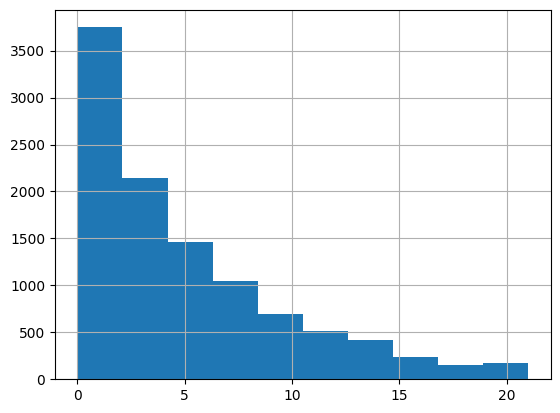

In [ ]:
anxiety['GAD_T'].hist()

#### Classification Analysis with Neural Network:

Doing the next step, we are diving the whole train and test to two classes for better classification. Originally GDA_T scores ranges from 0 to 21. Doing the following step categorizes it into 2 classes(Has Anxiety, or no anxiety)

In [ ]:
y_train_class = y_train.round().astype(int)
y_test_class = y_test.round().astype(int)

In [ ]:
y_train_class

9979    0
1097    0
9724    0
4196    0
334     0
       ..
5734    0
5191    0
5390    0
860     0
7270    0
Name: GAD_T, Length: 8472, dtype: int64

<Axes: >

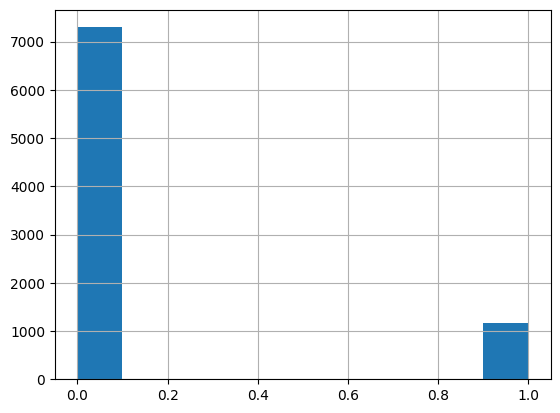

In [ ]:
y_train_class.hist()

In [ ]:
# Function to create, train, and evaluate the model
def evaluate_model(layers, activation, X_train, y_train_class, X_test, y_test_class):
    model_cls_nn = MLPClassifier(hidden_layer_sizes=layers, activation=activation, max_iter=500000, random_state=42)
    model_cls_nn.fit(X_train, y_train_class)
    y_pred_prob = model_cls_nn.predict_proba(X_test)[:, 1]
    y_pred = model_cls_nn.predict(X_test)
    accuracy_cls_nn = accuracy_score(y_test_class, y_pred)
    conf_matrix_cls_nn = confusion_matrix(y_test_class, y_pred)

    # Calculating Pearson correlation
    correlation_cls_nn, _ = pearsonr(y_test, y_pred_prob)

    return accuracy_cls_nn, conf_matrix_cls_nn , correlation_cls_nn, model_cls_nn

In [ ]:
# Defining configurations
layer_configs = [
    (10,), (20,), (10, 10), (20, 10), (20, 20),
    (30, 20, 10), (40, 30, 20, 10)
]
activations = ['relu', 'logistic', 'identity']

# Dictionary to store results
results_cls_nn = {}

In [ ]:
# Iterating over configurations
for activation in activations:
    for layers in layer_configs:
        accuracy_cls_nn, conf_matrix_cls_nn, correlation_cls_nn, model_cls_nn = evaluate_model(layers, activation, X_train, y_train_class, X_test, y_test_class)
        results_cls_nn[(layers, activation)] = (accuracy_cls_nn, conf_matrix_cls_nn, correlation_cls_nn)

In [ ]:
results_cls_nn

{((10,), 'relu'): (0.8669183577159038,
  array([[1759,   46],
         [ 236,   78]]),
  0.5285775502196223),
 ((20,), 'relu'): (0.8636149126946673,
  array([[1755,   50],
         [ 239,   75]]),
  0.5026444226163517),
 ((10, 10), 'relu'): (0.8664464369985843,
  array([[1761,   44],
         [ 239,   75]]),
  0.5086555225069296),
 ((20, 10), 'relu'): (0.8570080226521944,
  array([[1740,   65],
         [ 238,   76]]),
  0.46629597113176174),
 ((20, 20), 'relu'): (0.8522888154789995,
  array([[1724,   81],
         [ 232,   82]]),
  0.4303738545892036),
 ((30, 20, 10), 'relu'): (0.8381311939594148,
  array([[1682,  123],
         [ 220,   94]]),
  0.38906739492211834),
 ((40, 30, 20, 10), 'relu'): (0.8334119867862199,
  array([[1690,  115],
         [ 238,   76]]),
  0.29454821714020474),
 ((10,), 'logistic'): (0.8673902784332232,
  array([[1774,   31],
         [ 250,   64]]),
  0.5420874089625065),
 ((20,), 'logistic'): (0.8664464369985843,
  array([[1773,   32],
         [ 251,   63

In [ ]:
# Processing and reporting results
best_config = max(results_cls_nn, key=lambda x: results_cls_nn[x][0])
best_accuracy, best_conf_matrix, best_correlation = results_cls_nn[best_config]

print(f"Best Configuration: {best_config}")
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Correlation: {best_correlation}")
print(f"Confusion Matrix:\n{best_conf_matrix}")

Best Configuration: ((40, 30, 20, 10), 'logistic')
Best Accuracy: 0.8716375648890986
Best Correlation: 0.5325210659339328
Confusion Matrix:
[[1767   38]
 [ 234   80]]


##Feature Selection

##### Filters with SVM

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from math import sqrt

anxiety = pd.read_csv('clean_game.csv')

# Selecting relevant columns
dataforFilter = anxiety[["GAD_T", "Hours", "SPIN_T", "SWL_T", 'League_clean', 'Narcissism_Cat', 'Playstyle_clean', 'Work', 'earnings_clean', 'whyplay_clean']]

# One-hot encoding categorical variables
dataforFilter_encoded = pd.get_dummies(dataforFilter, columns=['League_clean', 'Narcissism_Cat', 'Playstyle_clean', 'Work', 'earnings_clean', 'whyplay_clean'])

# Splitting data into features and target
X = dataforFilter_encoded.iloc[:, 1:]
y = dataforFilter_encoded.iloc[:, 0]

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the splits for confirmation
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8472, 34)
y_train shape: (8472,)
X_test shape: (2119, 34)
y_test shape: (2119,)


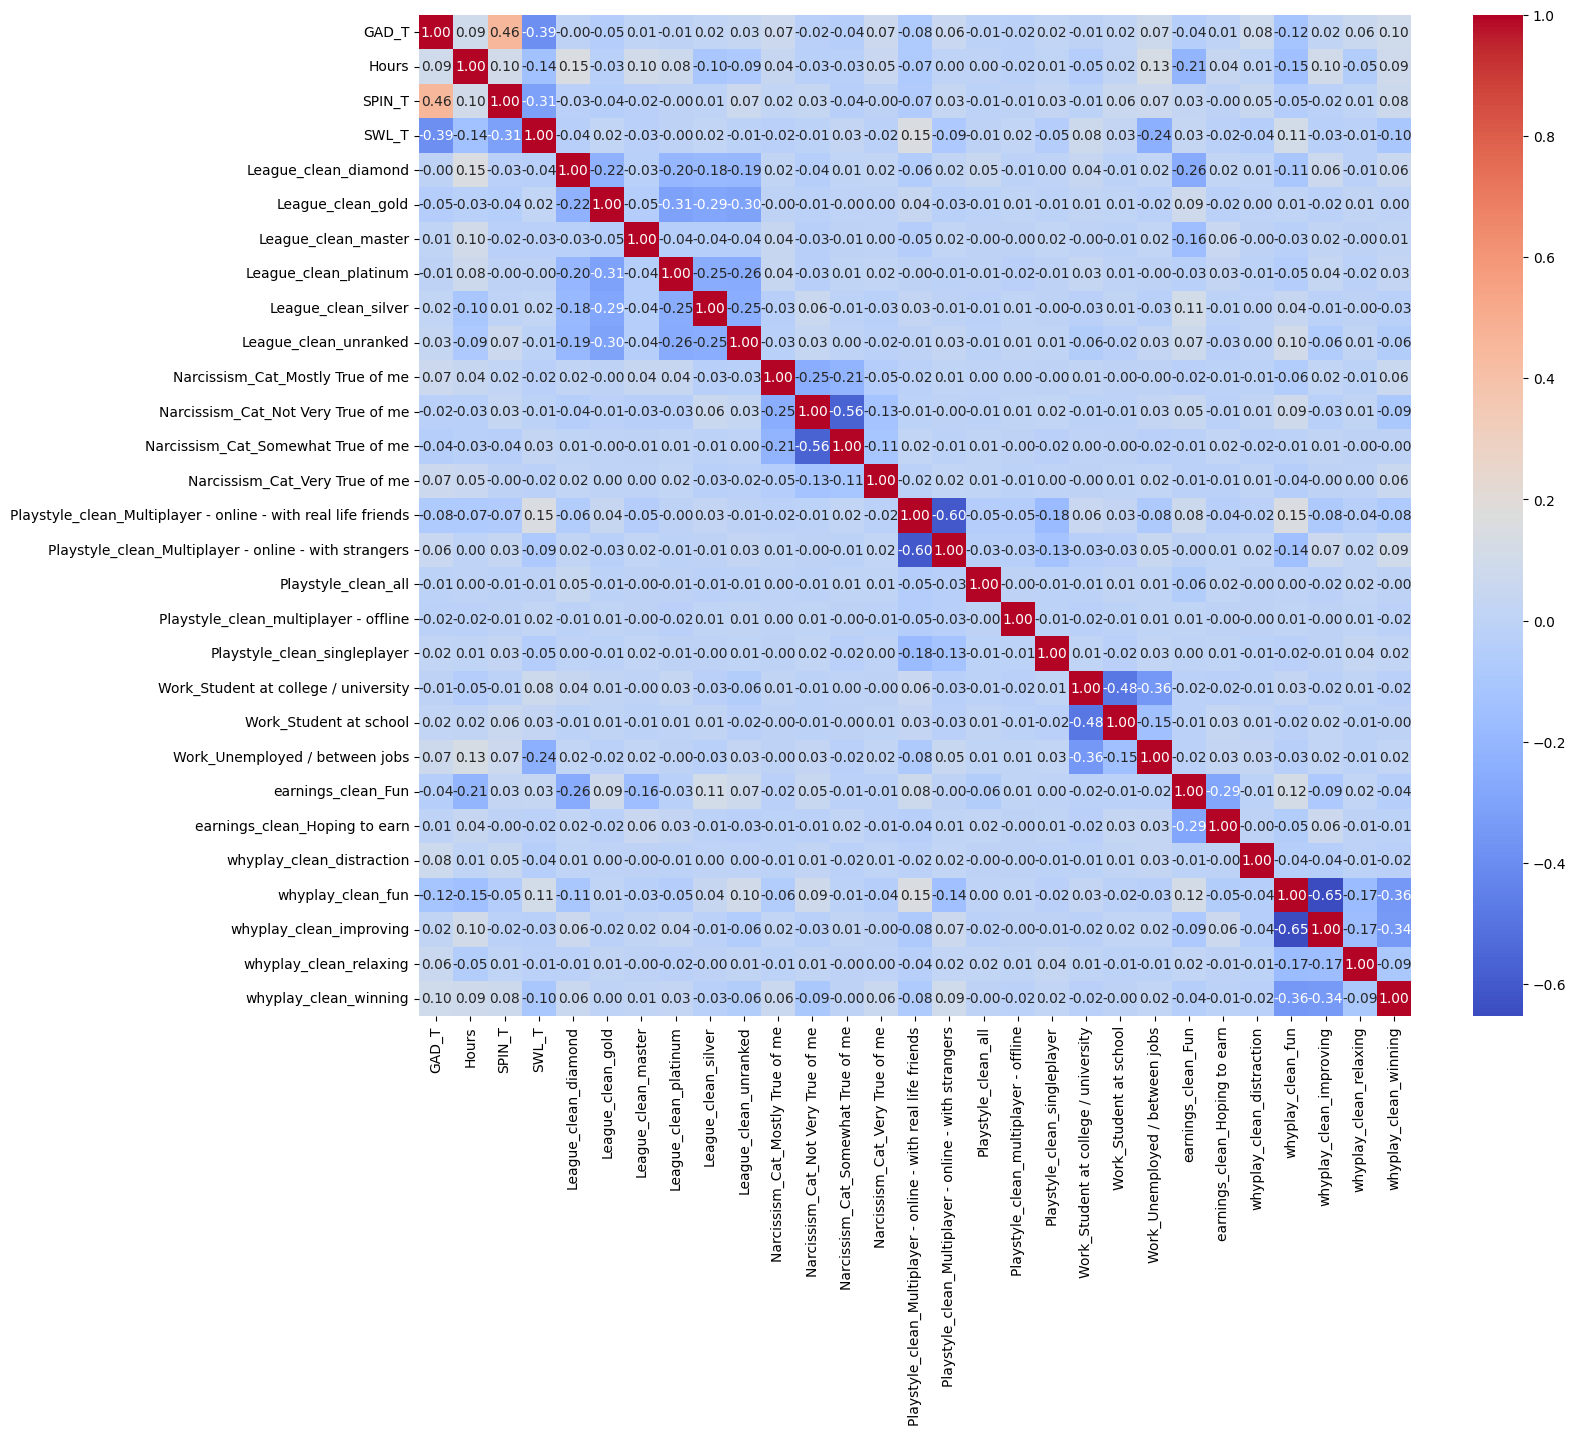

In [ ]:
# Sampling the dataset
train = dataforFilter.sample(frac=0.8, random_state=1)
test = dataforFilter.drop(train.index)

# One-Hot Encoding for categorical variables
train_dummy = pd.get_dummies(train, drop_first=True)

# Computing correlation
corrV = train_dummy.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(16, 13))
sns.heatmap(corrV, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
# Fitting the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = svr_model.predict(X_test)

# Calculating the Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Printing results
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))

Mean Squared Error: 16.06
Root Mean Squared Error: 4.01


In [ ]:
# Update the model by removing a less significant feature
# For example, removing 'Playstyle_clean_all'
X_train_updated = X_train.drop(['Playstyle_clean_all', 'Playstyle_clean_Multiplayer - online - with real life friends', 'Playstyle_clean_Multiplayer - online - with strangers', 'Playstyle_clean_multiplayer - offline', 'Playstyle_clean_singleplayer'], axis=1, errors='ignore')
X_test_updated = X_test.drop(['Playstyle_clean_all', 'Playstyle_clean_Multiplayer - online - with real life friends', 'Playstyle_clean_Multiplayer - online - with strangers', 'Playstyle_clean_multiplayer - offline', 'Playstyle_clean_singleplayer'], axis=1, errors='ignore')

In [ ]:
# Fitting the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_updated, y_train)

# Predicting on the test set
y_pred = svr_model.predict(X_test_updated)

# Calculating the Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Printing results
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))

Mean Squared Error: 16.05
Root Mean Squared Error: 4.01


##### L1( Regulaarization) -  Embedded  For NeuralNetwork

In [ ]:
# 1. Loading the Dataset
anxiety = pd.read_csv('clean_game.csv')


# Displaying the first few rows of the dataset
anxiety.head()

# Separating numerical and categorical data
numerical_data = anxiety[['GAD_T', 'Hours', 'SPIN_T', 'SWL_T']]
categorical_data = anxiety[['whyplay_clean','League_clean', 'Narcissism_Cat', 'Playstyle_clean', 'Work', 'earnings_clean']]


# Normalizing numerical data
scaler = MinMaxScaler()
numerical_data_norm = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)


# Encoding categorical data
encoder = OneHotEncoder(sparse=False)
categorical_data_encoded = pd.DataFrame(encoder.fit_transform(categorical_data), columns=encoder.get_feature_names_out())


# Recombining the data
dataForNN_norm = pd.concat([numerical_data_norm, categorical_data_encoded], axis=1)


# Displaying summary statistics
print("Before Normalization:", anxiety.describe())
print("After Normalization:", dataForNN_norm.describe())



# Splitting the dataset into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(dataForNN_norm, test_size=0.2, random_state=42)


# Displaying the shape of test and train datasets
train_data.shape, test_data.shape

# Preparing the data for neural network models
X_train = train_data.drop('GAD_T', axis=1)
y_train = train_data['GAD_T']
X_test = test_data.drop('GAD_T', axis=1)
y_test = test_data['GAD_T']



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Before Normalization:                 Age        GAD_T         Hours    Narcissism        SPIN_T  \
count  10591.000000  10591.00000  10591.000000  10591.000000  10591.000000   
mean      20.828911      5.17411     21.360023      2.021433     19.730998   
std        3.154145      4.66851     13.257550      1.057378     13.368407   
min       18.000000      0.00000      0.000000      1.000000      0.000000   
25%       18.000000      2.00000     12.000000      1.000000      9.000000   
50%       20.000000      4.00000     20.000000      2.000000     17.000000   
75%       22.000000      8.00000     28.000000      3.000000     28.000000   
max       56.000000     21.00000    120.000000      5.000000     68.000000   

              SWL_T  
count  10591.000000  
mean      19.838825  
std        7.181354  
min        5.000000  
25%       14.000000  
50%       20.000000  
75%       26.000000  
max       35.000000  
After Normalization:               GAD_T         Hours        SPIN_T         

In [ ]:
from keras.regularizers import l1

def build_and_evaluate_model(layers, activation, l1_strength, X_train, y_train, X_test, y_test):
    model_reg_l1 = Sequential()
    model_reg_l1.add(Dense(layers[0], activation=activation, input_shape=(X_train.shape[1],), kernel_regularizer=l1(l1_strength)))

    for layer_size in layers[1:]:
        model_reg_l1.add(Dense(layer_size, activation=activation, kernel_regularizer=l1(l1_strength)))

    model_reg_l1.add(Dense(1))

    model_reg_l1.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])

    history = model_reg_l1.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
    return model_reg_l1, history


In [ ]:
# Defining configurations
layer_configs = [(10,), (20,), (10, 10), (20, 10), (20, 20), (30, 20, 10), (40, 30, 20, 10)]
activations = ['relu', 'sigmoid']

# Dictionary to store results
results = {}

#Definining L1 Strength
l1_strength = 0.01

# Iterate over configurations
for activation in activations:
    for layers in layer_configs:
        model_reg_l1, history = build_and_evaluate_model(layers, activation,l1_strength,  X_train, y_train, X_test, y_test)
        results[(layers, activation)] = history.history

In [ ]:
# Identifing the best model based on mae
best_config = max(results, key=lambda x: max(results[x]['val_mae']))
best_history = results[best_config]

In [ ]:
# Sorting the results based on the highest final validation accuracy
sorted_results = sorted(results.items(), key=lambda x: max(x[1]['val_mae']), reverse=True)

# Printing the top 5 configurations
print("Top 5 Configurations:")
for i in range(5):
    config, performance = sorted_results[i]
    best_val_accuracy = max(performance['val_mae'])
    print(f"Rank {i+1}: Configuration {config}, Best Validation Accuracy: {best_val_accuracy:.4f}")

Top 5 Configurations:
Rank 1: Configuration ((10,), 'sigmoid'), Best Validation Accuracy: 0.1928
Rank 2: Configuration ((20, 20), 'sigmoid'), Best Validation Accuracy: 0.1874
Rank 3: Configuration ((20,), 'sigmoid'), Best Validation Accuracy: 0.1849
Rank 4: Configuration ((20, 20), 'relu'), Best Validation Accuracy: 0.1847
Rank 5: Configuration ((30, 20, 10), 'sigmoid'), Best Validation Accuracy: 0.1842


#### Random Forests with RFE

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Selecting relevant columns
dataforRFE = anxiety[["GAD_T", "Hours", "SPIN_T", "SWL_T", 'League_clean', 'Narcissism_Cat', 'Playstyle_clean', 'Work', 'earnings_clean', 'whyplay_clean']]

# One-hot encoding categorical variables
dataforRFE_encoded = pd.get_dummies(dataforRFE, columns=['League_clean', 'Narcissism_Cat', 'Playstyle_clean', 'Work', 'earnings_clean', 'whyplay_clean'])

# Splitting data into features and target
X = dataforRFE_encoded.iloc[:, 1:]  # features
y = dataforRFE_encoded.iloc[:, 0]   # target

# Creating a random forest classifier
rf = RandomForestClassifier()

# Creating the RFE object and compute a cross-validated score
rfecv = RFECV(estimator=rf, step=1, cv=10, scoring='accuracy')

# Fitting RFECV
rfecv.fit(X, y)



RFECV(cv=10, estimator=RandomForestClassifier(), scoring='accuracy')

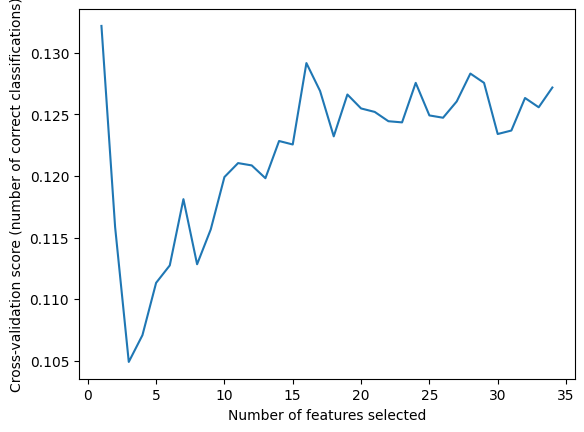

Optimal number of features : 1
Index(['SPIN_T'], dtype='object')


In [ ]:
# Plotting the number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (number of correct classifications)")

# We are using 'cv_results_' for newer versions of scikit-learn and for older version we are using the else.
if hasattr(rfecv, 'cv_results_'):
    grid_scores = rfecv.cv_results_['mean_test_score']
else:
    grid_scores = rfecv.grid_scores_

plt.plot(range(1, len(grid_scores) + 1), grid_scores)
plt.show()


# Printing the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

# Getting the selected features
selected_features = X.columns[rfecv.support_]
print(selected_features)

## Comparative Analysis

Summary Statistics for Model Performances:
           rf_cv  rf_repeatedcv    rf_boot    nnet_cv  nnet_repeatedcv  \
count  10.000000      30.000000  10.000000  10.000000        30.000000   
mean    0.127466       0.129386   0.125858   0.140685         0.140717   
std     0.008450       0.009828   0.003984   0.009935         0.011228   
min     0.112370       0.110482   0.118707   0.122757         0.121813   
25%     0.123466       0.123702   0.125215   0.136449         0.132200   
50%     0.128895       0.129367   0.126430   0.142587         0.138679   
75%     0.132169       0.134561   0.127431   0.147038         0.148017   
max     0.141643       0.152030   0.132437   0.153919         0.167139   

       nnet_boot   rpart_cv  rpart_repeatedcv  rpart_boot  svmRadial_cv  \
count  10.000000  10.000000         30.000000   10.000000     10.000000   
mean    0.136756   0.113869          0.112675    0.106350      0.147484   
std     0.004637   0.010174          0.009117    0.006878      0.

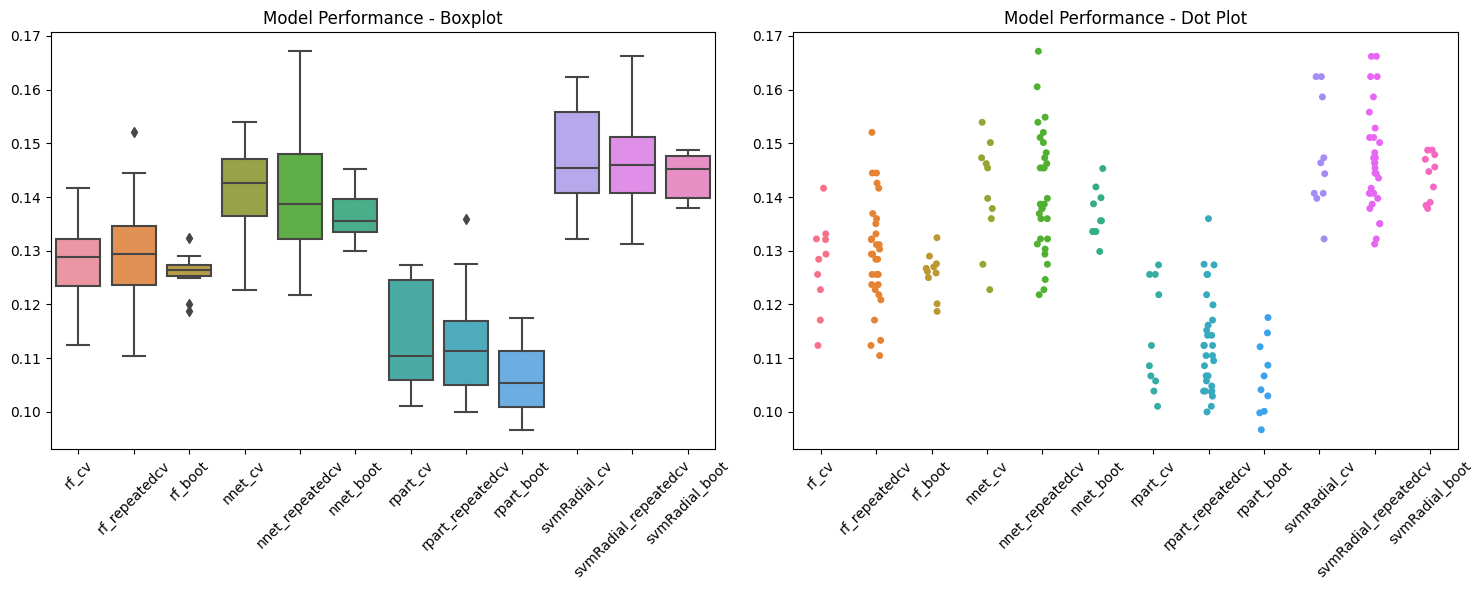

In [ ]:

import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedKFold, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
data = pd.read_csv("/content/clean_game.csv")
selected_columns = ["GAD_T", "Narcissism", "SPIN_T", "Hours", "SWL_T", "whyplay_clean", "Work", "Playstyle_clean"]
data = data[selected_columns]

# Convert character columns to categories
categorical_features = data.select_dtypes(include='object').columns
for col in categorical_features:
    data[col] = LabelEncoder().fit_transform(data[col])

# Convert target column to numeric
data['GAD_T'] = LabelEncoder().fit_transform(data['GAD_T'])

# Define the features and target variable
X = data.drop('GAD_T', axis=1)
y = data['GAD_T']

# Define models with modified MLPClassifier
models = {
    'rf': RandomForestClassifier(random_state=7),
    'nnet': MLPClassifier(random_state=7, max_iter=500),
    'rpart': DecisionTreeClassifier(random_state=7),
    'svmRadial': SVC(kernel='rbf', random_state=7)
}

# Define a function for standard cross-validation
def cross_validate_model(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(accuracy_score))
    return scores

# Custom bootstrapping function
def bootstrap_cross_validate(model, X, y, n_iterations=10, test_size=0.33):
    scores = []
    for i in range(n_iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        X_train, y_train = resample(X_train, y_train)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
    return np.array(scores)

# Define cross-validation strategies
cv = KFold(n_splits=10, random_state=7, shuffle=True)
repeated_cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=7)

# Train models and collect results
results = {}
for name, model in models.items():
    results[name + '_cv'] = cross_validate_model(model, X, y, cv)
    results[name + '_repeatedcv'] = cross_validate_model(model, X, y, repeated_cv)
    results[name + '_boot'] = bootstrap_cross_validate(model, X, y)

# Convert results to DataFrame for visualization
results_df = pd.DataFrame.from_dict(results, orient='index').transpose()

# Calculate summary statistics for each model
summary_stats = results_df.describe()
print("Summary Statistics for Model Performances:")
print(summary_stats)

# Plotting results with boxplot and dot plot
plt.figure(figsize=(15, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=results_df)
plt.xticks(rotation=45)
plt.title('Model Performance - Boxplot')

# Dot plot
plt.subplot(1, 2, 2)
sns.stripplot(data=results_df, size=5, jitter=True)
plt.xticks(rotation=45)
plt.title('Model Performance - Dot Plot')

plt.tight_layout()
plt.show()
